In [1]:
#dataset creation
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(

n_samples=10000, #number of samples
n_features=20, #total number of features
n_informative=10, #number of informative features
n_redundant= 5, #number of redundant features
n_classes=2, #binary classification
weights= [ 0.9,0.1], #imbalance in classes
random_state=42
)

In [3]:
X

array([[ 1.71680873,  0.4134728 , -1.14271127, ...,  0.37005944,
         0.41041778,  1.39331973],
       [-1.36895415,  1.1117695 ,  2.86947625, ...,  0.56414783,
        -0.26122953,  0.81322509],
       [ 0.75931228, -0.5107338 , -2.39041798, ..., -0.57849617,
         5.20576477, -5.85639155],
       ...,
       [ 2.33219667,  0.36296404, -1.97840566, ..., -2.41645806,
         2.74965494, -2.48019524],
       [ 0.0365941 ,  1.52217738,  6.3477131 , ..., -0.91498035,
         0.12358674, -3.49188144],
       [ 0.85675672,  0.78254461, -0.81864194, ..., -1.30068551,
        -0.16297446,  2.02091135]])

In [4]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

train_data= pd.DataFrame(X_train)
train_data['is_fraud'] = y_train
print(train_data.head())

          0         1         2         3         4         5         6  \
0  2.278234 -1.077782  0.683749  1.258036  1.096891 -0.373797 -2.285019   
1  0.207762  2.541868  2.669859  3.035471 -1.073374  0.991900  6.247372   
2  1.356635 -0.334045 -1.913800 -1.376498 -1.673701 -1.081030 -0.137141   
3  0.626707 -0.474721  0.581450  0.919342 -2.998093  0.834397  5.976509   
4  0.339939 -0.018194 -2.381988  0.389720  2.783303  0.493958 -1.095447   

          7         8         9  ...        11        12        13        14  \
0 -0.295547 -0.383005 -0.589401  ... -0.201196 -0.160192 -2.195265  0.092113   
1  1.157270 -0.774492  2.154005  ...  0.214034  0.244108 -4.769822 -1.326939   
2 -3.958890 -1.487756  1.188392  ... -0.657528 -0.747277 -0.531501 -0.657229   
3  2.033002  1.063391  2.630003  ...  0.063876  1.520281 -1.955266 -0.423872   
4 -2.181555 -0.884478  1.871163  ... -0.531785  0.363369 -5.204850 -0.626679   

         15        16        17        18        19  is_fraud  
0  1

### Random forest classifer

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train,y_train)

rf_predictions =rf_model.predict(X_test)

print('random forest classification report:\n', 
classification_report(y_test, rf_predictions))

print('random forest classification accuracy:', 
accuracy_score(y_test, rf_predictions))

random forest classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2681
           1       0.94      0.60      0.73       319

    accuracy                           0.95      3000
   macro avg       0.95      0.80      0.85      3000
weighted avg       0.95      0.95      0.95      3000

random forest classification accuracy: 0.9536666666666667


### Gradient Boosting Classifier

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train,y_train)

gb_predictions =gb_model.predict(X_test)

print('Gradient Boosting classification report:\n', 
classification_report(y_test, gb_predictions))

print('Gradient Boosting accuracy:', 
accuracy_score(y_test, gb_predictions))

Gradient Boosting classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2681
           1       0.89      0.55      0.68       319

    accuracy                           0.95      3000
   macro avg       0.92      0.77      0.83      3000
weighted avg       0.94      0.95      0.94      3000

Gradient Boosting accuracy: 0.9453333333333334


### Neural Network Classifer


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [9]:
#Standardize the features for Neural Network
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [11]:
#build the Neural Network model
nn_model= Sequential([ #defines a model as a linear stack of layers
    Dense(64, activation ='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation ='relu'),
    Dense(1, activation ='sigmoid'), #used for binary classification, outputs probabilities between 0 and 1
])

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])

In [13]:
#train the model
history= nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32,
validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8591 - loss: 0.3573 - val_accuracy: 0.9393 - val_loss: 0.1912
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 0.1754 - val_accuracy: 0.9471 - val_loss: 0.1653
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1513 - val_accuracy: 0.9457 - val_loss: 0.1477
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.1380 - val_accuracy: 0.9479 - val_loss: 0.1433
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1189 - val_accuracy: 0.9607 - val_loss: 0.1280
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1223 - val_accuracy: 0.9579 - val_loss: 0.1245
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1205 - val_accuracy: 0.9593 - val_loss: 0.1202
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.1176 - val_accuracy: 0.

In [14]:
#predict on test set
nn_predictions = (nn_model.predict(X_test_scaled)>0.5).astype("int32")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
#evaluate the model
print('Neural Network classification report:\n', classification_report(y_test, nn_predictions))

print('Neural Network accuracy:', accuracy_score(y_test, nn_predictions))

Neural Network classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2681
           1       0.91      0.71      0.80       319

    accuracy                           0.96      3000
   macro avg       0.94      0.85      0.89      3000
weighted avg       0.96      0.96      0.96      3000

Neural Network accuracy: 0.9616666666666667


### comparsion

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    matrix =confusion_matrix(y_true, y_pred)
    sns.heatmap(matrix,annot=True, fmt='d', cmap='Blues',
    xticklabels= ['not fraud','fraud'], yticklabels=['not fraud','fraud'])
    plt.title(title)
    plt.xlabel ('predicted label')
    plt.ylabel ('true label')
    plt.show()


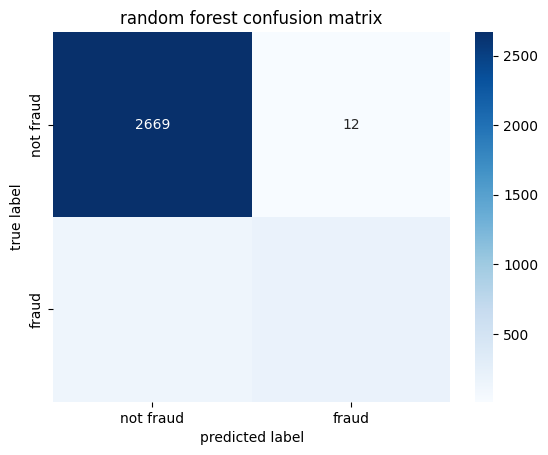

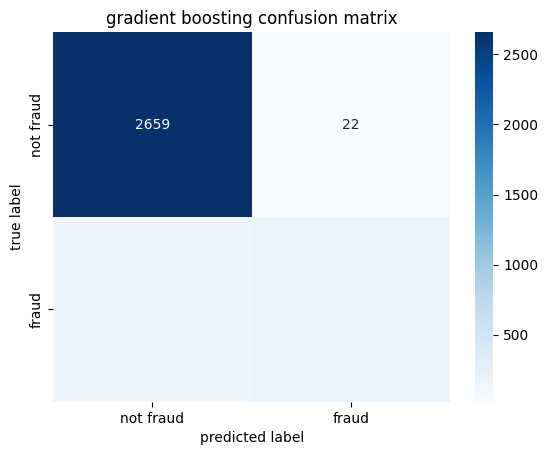

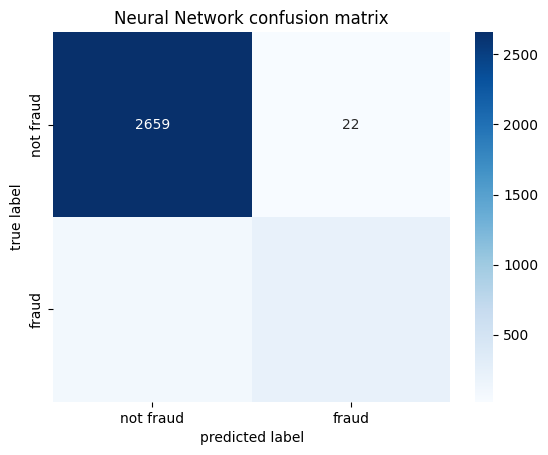

In [22]:
plot_confusion_matrix(y_test, rf_predictions,'random forest confusion matrix')

plot_confusion_matrix(y_test, gb_predictions,'gradient boosting confusion matrix')

plot_confusion_matrix(y_test, nn_predictions,'Neural Network confusion matrix')